# Impact of path on spectral estimates in an offline DA product: the Last Millennium Reanalysis 

In [7]:
%load_ext autoreload
%autoreload 2
# import the pens package (https://github.com/fzhu2e/pens)
import pens

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load LMR 2.1 data from a local .nc file

In [8]:
# Load LMR global-mean data
ens = pens.EnsembleTS().load_nc('./data/gmt_MCruns_ensemble_full_LMRv2.1.nc', var='gmt')
print(ens.value.shape)
print(ens.nt)
print(ens.nEns)

(2001, 2000)
2001
2000


## Plot the quantiles of the ensembles

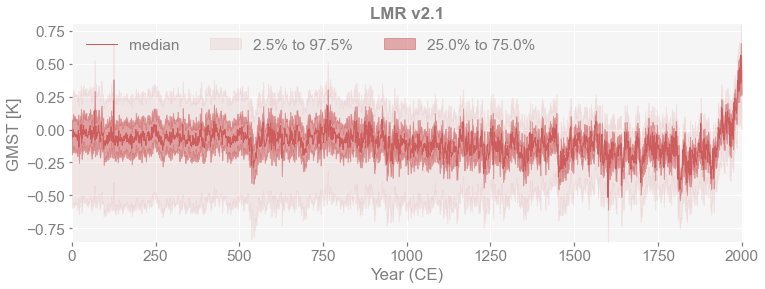

In [9]:
fig, ax = ens.plot_qs(ylabel='GMST [K]', title='LMR v2.1')

## Plot the ensembles in the form of line density

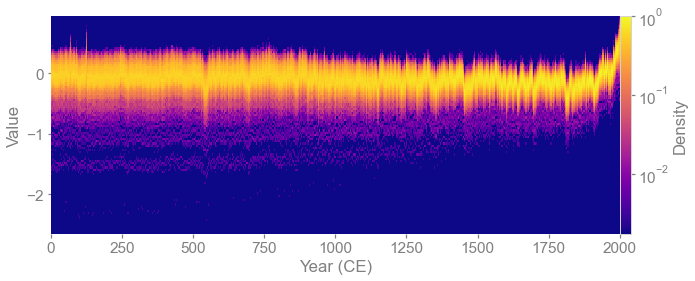

In [10]:
fig, ax = ens.line_density(color_scale='log', bins=[500, 100])

## Get and plot random sample paths from the ensembles

(2001, 1)
(2001, 3)


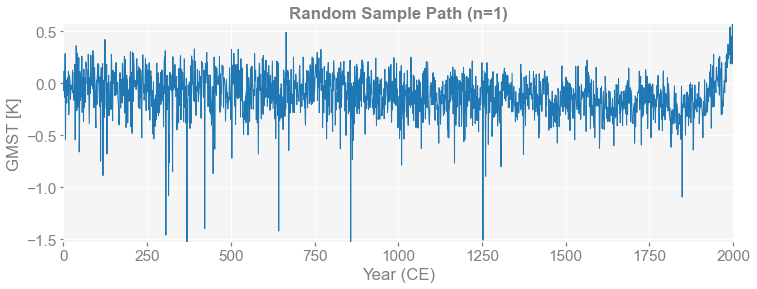

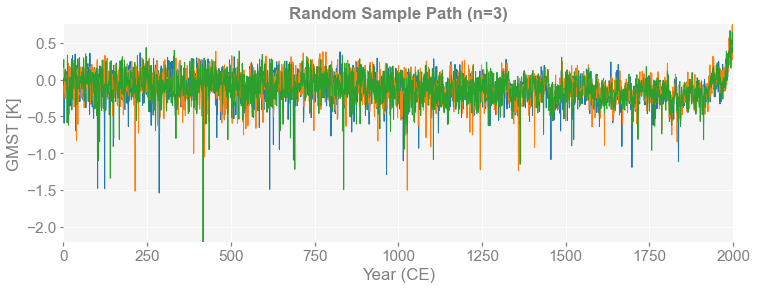

In [11]:
for n in [1, 3]:
    ps = ens.sample_random(n=n, seed=2333)
    fig, ax = ps.plot(ylabel='GMST [K]', title=f'Random Sample Path (n={n})')
    print(ps.value.shape)

Obviouskly, sampling from this ensemble will change the assessment of the timing of certain events (e.g. extreme cooling) in a given series, though the distribution is invariant.  How does this affect the estimation of spectral features?


## Impact on spectral features: peaks and continuum

Convert the series to a pyleoclim [EnsembleSeries object](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#ensembleseries-pyleoclim-ensembleseries) to easily estimate spectra

In [12]:
ps = ens.sample_random(n=1000, seed=2333)
es = ps.to_pyleo()    

In [13]:
es_spec = es.spectral(method='mtm')

Performing spectral analysis on individual series: 100%|██████████| 1000/1000 [00:59<00:00, 16.84it/s]


<AxesSubplot:xlabel='Period', ylabel='PSD'>

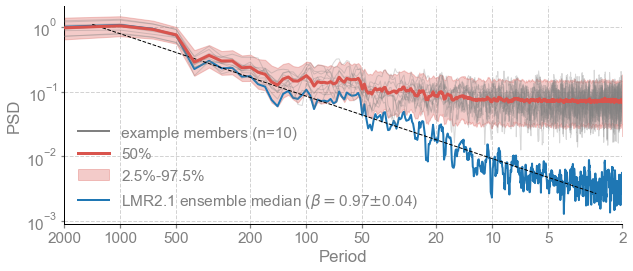

In [14]:
fig, ax = es_spec.plot_envelope()
# extract and analyze the ensemble median
esm = ps.get_median()
esm = esm.to_pyleo(label='LMR2.1 ensemble median')
esm_spec = esm.spectral(method ='mtm')
esm_beta = esm_spec.beta_est() # estimate spectral exponent
esm_beta.plot(ax=ax)

### Estimate and plot scaling exponents

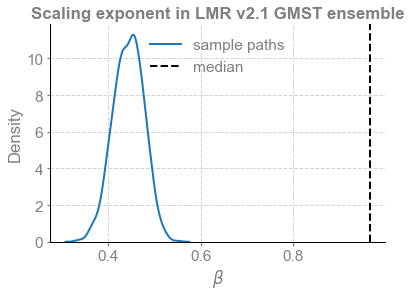

In [15]:
import seaborn as sns

es_beta = es_spec.beta_est() # estimate scaling exponents
ax = sns.kdeplot(es_beta.beta_est_res['beta'],label='sample paths') # plot their distribution
ax.set_xlabel(r'$\beta$')
ax.set_title('Scaling exponent in LMR v2.1 GMST ensemble',fontweight='bold')
ax.axvline(x=esm_beta.beta_est_res['beta'],ymin=0,ymax=10,ls='--',lw=2, color='black',label='median') # add the scaling exponent of the median trajectory
ax.legend(loc='upper center')

Evidently, sampling from the ensemble has a great impact on the estimated spectral slope. It is expected that online DA would greatly mitigate this effect.